In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the U-Net model
def unet(input_size=(256, 256, 3)):
    inputs = tf.keras.Input(input_size)
    
    # Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)
    
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    
    # Decoder
    up6 = layers.concatenate([layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)
    
    up7 = layers.concatenate([layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)
    
    up8 = layers.concatenate([layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)
    
    up9 = layers.concatenate([layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)
    
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv9)
    
    model = models.Model(inputs=[inputs], outputs=[outputs])
    
    return model

# Prepare your data
# Assuming you have numpy arrays for images and masks
# X_train, y_train = images_array, masks_array

# Compile the model
model = unet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# model.fit(X_train, y_train, batch_size=4, epochs=10, validation_split=0.2)


In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the directory where your images are stored
image_dir = r"C:\Users\jithu\Desktop\train\x\1"

# List all files in the directory
image_files = os.listdir(image_dir)

# Initialize an empty list to store images
images = []

# Loop through all image files
for i in range(1,11):
    # Read each image
    image = cv2.imread(rf"C:\Users\jithu\Desktop\train\x\{i}\{i}.png")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Append image to the list
    images.append(image)

# Stack images into a single numpy array
stacked_images1 = np.stack(images)

# Print the shape of the stacked numpy array
print("Shape of stacked images array:", stacked_images1.shape)
   

Shape of stacked images array: (10, 256, 256, 3)


In [3]:
# Initialize an empty list to store images
images = []

# Loop through all image files
for i in range(1,11):
    # Read each image
    image = cv2.imread(rf"C:\Users\jithu\Desktop\train\y\{i}\{i}.png")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Append image to the list
    images.append(image)

# Stack images into a single numpy array
stacked_images2 = np.stack(images)

# Print the shape of the stacked numpy array
print("Shape of stacked images array:", stacked_images2.shape)

Shape of stacked images array: (10, 256, 256)


In [4]:
import numpy as np

# Assuming you have 10 images and masks stored as numpy arrays
# Replace 'images.npy' and 'masks.npy' with your actual filenames
images_file = 'images.npy'
masks_file = 'masks.npy'

# Load images and masks
images = np.array(stacked_images1)
masks = np.array(stacked_images2)

# Normalize images to range [0, 1]
images = images.astype('float32') / 255.0

# Normalize masks to binary [0, 1]
masks = masks.astype('float32') / 255.0
masks[masks > 0.5] = 1.0
masks[masks <= 0.5] = 0.0

# Split data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

# Print the shape of training and validation sets
print("Training images shape:", X_train.shape)
print("Training masks shape:", y_train.shape)
print("Validation images shape:", X_val.shape)
print("Validation masks shape:", y_val.shape)


Training images shape: (8, 256, 256, 3)
Training masks shape: (8, 256, 256)
Validation images shape: (2, 256, 256, 3)
Validation masks shape: (2, 256, 256)


Epoch 1/10
2/2 [==============================] - 12s 3s/step - loss: 0.6839 - accuracy: 0.5842 - val_loss: 0.5296 - val_accuracy: 0.9684
Epoch 2/10
2/2 [==============================] - 6s 3s/step - loss: 0.4794 - accuracy: 0.9716 - val_loss: 0.3454 - val_accuracy: 0.9684
Epoch 3/10
2/2 [==============================] - 6s 3s/step - loss: 0.3536 - accuracy: 0.9716 - val_loss: 0.2688 - val_accuracy: 0.9684
Epoch 4/10
2/2 [==============================] - 6s 3s/step - loss: 0.2738 - accuracy: 0.9716 - val_loss: 0.2471 - val_accuracy: 0.9684
Epoch 5/10
2/2 [==============================] - 6s 3s/step - loss: 0.2094 - accuracy: 0.9716 - val_loss: 0.1974 - val_accuracy: 0.9684
Epoch 6/10
2/2 [==============================] - 6s 3s/step - loss: 0.1710 - accuracy: 0.9716 - val_loss: 0.1561 - val_accuracy: 0.9684
Epoch 7/10
2/2 [==============================] - 6s 3s/step - loss: 0.1359 - accuracy: 0.9716 - val_loss: 0.1272 - val_accuracy: 0.9684
Epoch 8/10
2/2 [========================

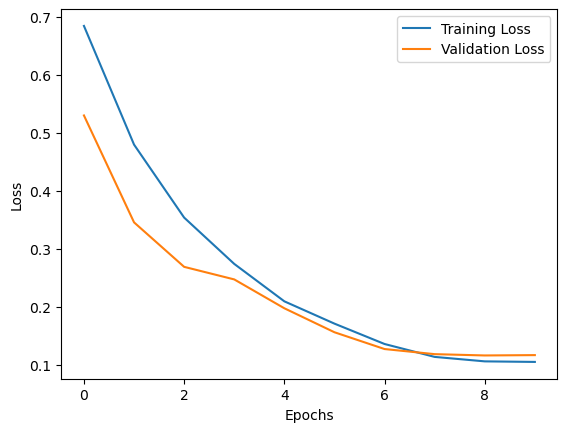

In [5]:
# Train the model
history = model.fit(X_train, y_train, batch_size=4, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 [==============================] - 0s 178ms/step


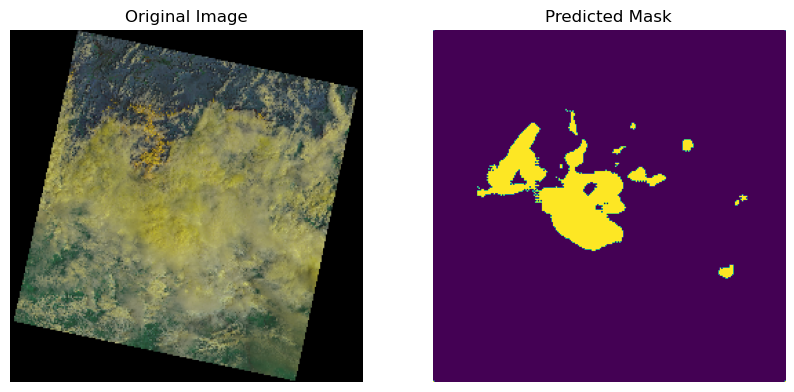

In [11]:
# Assuming you have a trained model named 'model'

# Load a single image for prediction
# Replace 'image_path.jpg' with the path to your image
image_path = r"C:\Users\jithu\Desktop\train\x\1\1.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype('float32') / 255.0

# Reshape the image to match model input shape
image = np.expand_dims(image, axis=0)

# Predict mask
predicted_mask = model.predict(image)
predicted_mask=predicted_mask[0, :, :, 0]
predicted_mask=predicted_mask>0.18
predicted_mask=predicted_mask.astype(np.uint8)
binary_mask=predicted_mask*255
# Visualize the original image and predicted mask
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image[0])
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_mask)
plt.title('Predicted Mask')
plt.axis('off')

plt.show()


In [58]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='unet_model.png', show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [12]:
model.save(r"C:\Users\jithu\Desktop\train\New folder\final.h5")

c:\Users\jithu\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
pip install graphviz

                                              0.0/47.1 kB ? eta -:--:--
     --------                                 10.2/47.1 kB ? eta -:--:--
     ------------------------               30.7/47.1 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 47.1/47.1 kB 338.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
